
# <span style='color:green;font-size:200%'> Gráficos de COVID-19 por paises</span>
***

## <span style='color:blue;font-size:100%'> Paises selecionados:</span>
* USA        
* Brasil   
* Alemanha
* Itália   
* Russia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from read_covid19 import read

## <span style='color:red;font-size:100%'> Atualiza do dataset</span>

In [2]:
new = True

In [3]:
if new:    
    read(url = 'https://covid-tracker-us.herokuapp.com')

---

In [4]:
dados = pd.read_csv('casos_e_mortes_confirmados.csv')

In [5]:
dados_grupo = dados.groupby('Pais')

In [6]:
dados_grupo.get_group('Brasil').tail(n=10)

,Data,Casos,Mortes,Pais,Dias,Casos_Media,Mortes_Media,Taxa_Casos_Media,Taxa_Mortes_Media,Taxa_Casos,Taxa_Mortes,Porcentagem,Porcentagem_Media
713,26/02/2021,10455630,252835,Brasil,346,1.027584e+07,248920.428571,54012.000000,1177.714286,61602.0,1386.0,2.42,2.42
714,27/02/2021,10517232,254221,Brasil,347,1.032986e+07,250098.142857,54726.428571,1205.428571,34027.0,721.0,2.42,2.42
715,28/02/2021,10551259,254942,Brasil,348,1.038458e+07,251303.571429,55977.285714,1225.285714,35742.0,778.0,2.42,2.42
716,01/03/2021,10587001,255720,Brasil,349,1.044056e+07,252528.857143,55578.714286,1261.714286,59925.0,1641.0,2.42,2.42
717,02/03/2021,10646926,257361,Brasil,350,1.049614e+07,253790.571429,56309.571429,1330.571429,71704.0,1910.0,2.42,2.42
718,03/03/2021,10718630,259271,Brasil,351,1.055245e+07,255121.142857,57610.142857,1353.142857,75102.0,1699.0,2.42,2.42
719,04/03/2021,10793732,260970,Brasil,352,1.061006e+07,256474.285714,59085.285714,1419.285714,75495.0,1800.0,2.42,2.42
720,05/03/2021,10869227,262770,Brasil,353,1.066914e+07,257893.571429,60229.142857,1443.428571,69609.0,1555.0,2.42,2.42
721,06/03/2021,10938836,264325,Brasil,354,1.072937e+07,259337.000000,66869.285714,1495.571429,80508.0,1086.0,2.42,2.42
722,07/03/2021,11019344,265411,Brasil,355,1.079624e+07,260832.571429,NaN,NaN,NaN,NaN,2.41,2.41


In [7]:
#paises = ['USA', 'Brasil', 'Espanha', 'Alemanha', 'Itália', 'Turquia' ]
#paises = ['USA', 'Brasil', 'Alemanha', 'Itália', 'Russia' ]
#paises_sem = ['Brasil', 'Russia', 'Itália', 'USA']
paises = ['USA', 'Brasil', 'India', 'Itália']
paises_sem = ['Brasil', 'USA', 'India', 'Itália']
# cores
cor = { 'Brasil'   :      'black',
         'USA'     :       'blue',
         'Itália'  :          'm',
         'Espanha' :        'red',
         'Russia'  : 'darkorange',
         'Alemanha':      'green',
         'India'   :      'green'}
# transparencia

alpha ={ 'Brasil'   :     1.0,
         'USA'     :      0.6,
         'Itália'  :      0.6,
         'Espanha' :      0.6,
         'Russia'  :      0.6,
         'Alemanha':      0.6,
         'India'   :      0.6}

#
mar = { 'Brasil'   :     None,
         'USA'     :      'o',
         'Itália'  :      '^',
         'Espanha' :      'x',
         'Russia'  :      's',
         'Alemanha':      'p',
         'India'   :      'p'}

#
lw = { 'Brasil'   :     3,
        'USA'     :     1,
        'Itália'  :     1,
        'Espanha' :     1,
        'Russia'  :     1,
        'Alemanha':     1,
        'India'   :     1}

# divisao do eixo x
#x_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

----
----
## <span style='color:green;font-size:150%'> Plotando o gráfico em logY dos casos totais confirmados</span>
---

<AxesSubplot:title={'center':'Casos Totais Confirmados'}, xlabel='Número de dias apartir do 200° caso', ylabel='Número de Casos'>

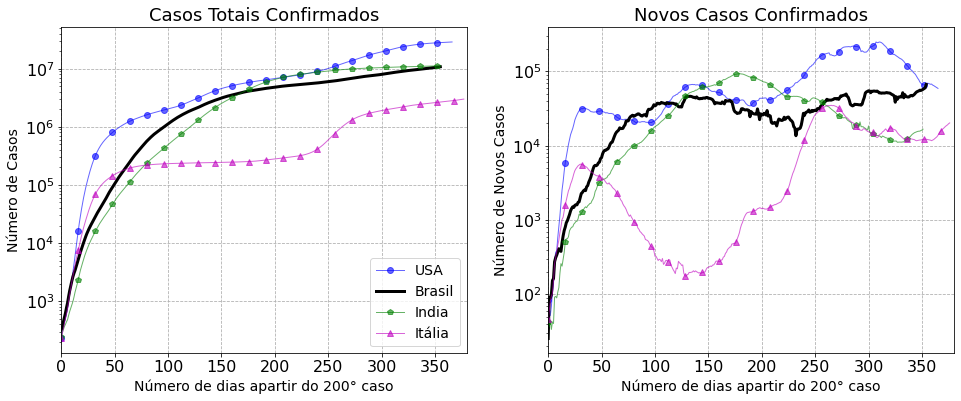

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises):
    ax1.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)

    ax2.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)
# eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 380)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Casos', fontsize = 14)
ax1.legend(loc = 'lower right', fontsize = 14)
ax1.set_title('Casos Totais Confirmados', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 380)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax2.set_ylabel('Número de Novos Casos', fontsize = 14)
ax2.set_title('Novos Casos Confirmados', fontsize = 18)
ax2.grid(ls = '--')

ax1

In [12]:
fig.savefig('../fig/casos.png', dpi = 300)

---
## <span style='color:green;font-size:150%'> Plotando o gráfico dos casos totais confirmados</span>
---

<AxesSubplot:title={'center':'Casos Totais Confirmados'}, xlabel='Número de dias apartir do 200° caso', ylabel='Número de Casos'>

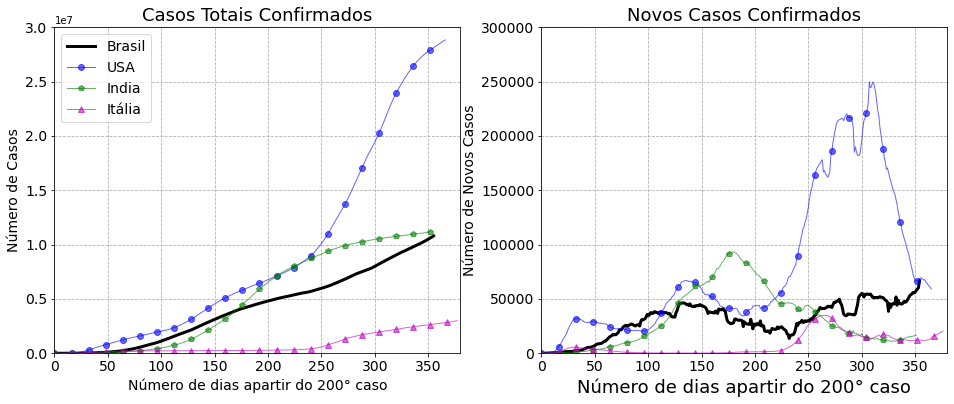

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises_sem):
    ax1.plot(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)

    ax2.plot(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)
# eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(14)

ax1.set_xlim(0, 380)
ax1.set_ylim(0, 30000000)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Casos', fontsize = 14)
ax1.legend(loc = 'upper left', fontsize = 14)
ax1.set_title('Casos Totais Confirmados', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(14)
    
ax2.set_xlim(0, 380)
ax2.set_ylim(0, 300000)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax2.set_ylabel('Número de Novos Casos', fontsize = 14)
ax2.set_title('Novos Casos Confirmados', fontsize = 18)
ax2.grid(ls = '--')

ax1

----
----
## <span style='color:green;font-size:150%'> Plotando o gráfico logY de mortes confirmadas</span>
---

<AxesSubplot:title={'center':'Mortes Totais Confirmadas'}, xlabel='Número de dias apartir do 200° caso', ylabel='Número de Mortes'>

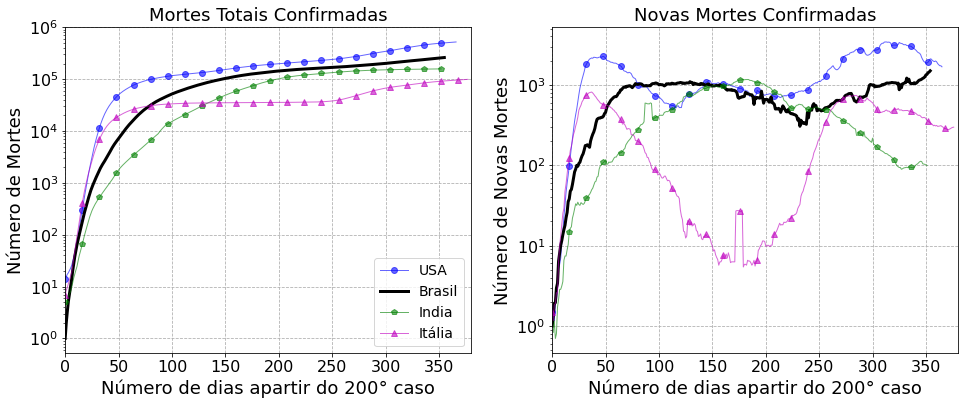

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises):
    ax1.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Mortes_Media'].get_group(name), 
                 label  = name, 
                 ls     = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)
    
    ax2.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Mortes_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)
#eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 380)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax1.set_ylabel('Número de Mortes', fontsize = 18)
ax1.legend(loc = 'lower right', fontsize = 14)
ax1.set_title('Mortes Totais Confirmadas', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 380)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax2.set_ylabel('Número de Novas Mortes', fontsize = 18)
ax2.set_title('Novas Mortes Confirmadas', fontsize = 18)
ax2.grid(ls = '--')

ax1

In [27]:
fig.savefig('../fig/mortes.png', dpi = 300)

---
## <span style='color:green;font-size:150%'> Plotando o gráfico dos casos totais confirmados</span>
---

<AxesSubplot:title={'center':'Mortes Totais Confirmadas'}, xlabel='Número de dias apartir do 200° caso', ylabel='Número de Mortes'>

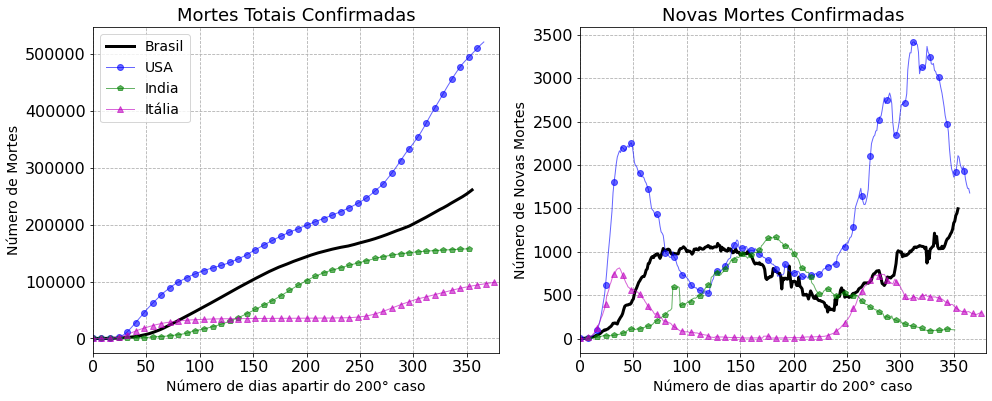

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises_sem):
    ax1.plot(dados_grupo.get_group(name).Dias, 
             dados_grupo['Mortes_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 8)
    
    ax2.plot(dados_grupo.get_group(name).Dias, 
             dados_grupo['Taxa_Mortes_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 8)

#eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 380)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Mortes', fontsize = 14)
ax1.legend(loc = 'upper left', fontsize = 14)
ax1.set_title('Mortes Totais Confirmadas', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 380)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax2.set_ylabel('Número de Novas Mortes', fontsize = 14)
ax2.set_title('Novas Mortes Confirmadas', fontsize = 18)
ax2.grid(ls = '--')

ax1

---
---
##  <span style='color:green;font-size:150%'> Plotando Porcentagem de Mortes </span>
-----

### $n_{casos} \rightarrow $  número total de casos confirmadas
### $n_{mortes}\rightarrow $  número total de mortes confirmadas

### $p = \frac{n_{mortes}}{n_{casos}} \times 100\rightarrow $ Porcentual de mortes


<AxesSubplot:title={'center':'Porcentagem de Mortes'}, xlabel='Número de dias apartir do 200° caso', ylabel='%'>

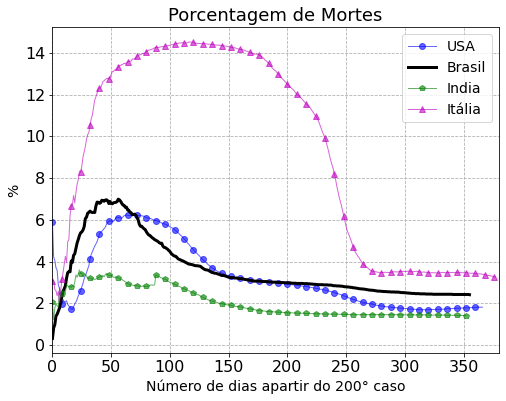

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

for i, name in enumerate(paises):
    ax.plot(dados_grupo.get_group(name).Dias,
            dados_grupo['Porcentagem_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 8)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

ax.set_xlim(0, 380)
ax.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax.set_ylabel('%', fontsize = 14)
ax.legend(loc = 'upper right', fontsize = 14)
ax.set_title('Porcentagem de Mortes', fontsize = 18)
ax.grid(ls = '--')

ax

In [21]:
fig.savefig('../fig/porcentagem_de_mortos.png', dpi = 300)

---
---